<a href="https://colab.research.google.com/github/maro000/for_data_analysis_and_visualization/blob/master/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series,DataFrame

In [7]:
!pwd

/content


In [0]:
titanic_df = pd.read_csv('./drive/My Drive/titanic/train.csv')

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


このデータから有用な知見を得るために、明確な目標があったほうが良いでしょう。いくつか、具体的な問いを設定してみます。

1.) タイタニック号の乗客はどのような人達だったのか？

2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？

3.) 乗客は主にどこから来たのか？

4.) 家族連れか、単身者か？

これらの基本的な問いの後に、さらに深くデータ解析を進めます。

5.) 沈没からの生還者には、どのような要因があったのか？
まず最初の質問： タイタニック号の乗客はどのような人達だったのか？

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

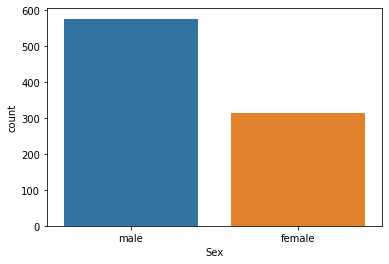

In [18]:
sns.countplot('Sex', data =titanic_df)

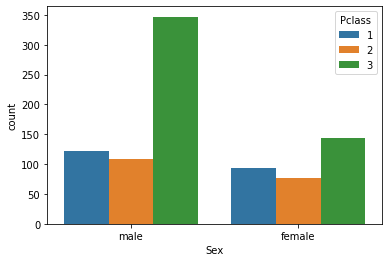

In [19]:
sns.countplot('Sex', data =titanic_df, hue = 'Pclass')

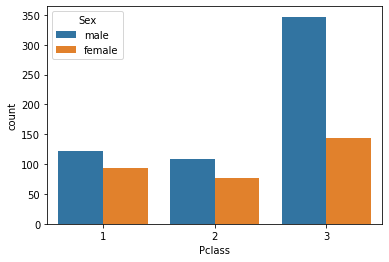

In [20]:
sns.countplot('Pclass', data =titanic_df, hue = 'Sex')

In [0]:
def male_female_child(passenger):
  age, sex = passenger
  if age <16:
    return 'child'
  else:
    return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [24]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


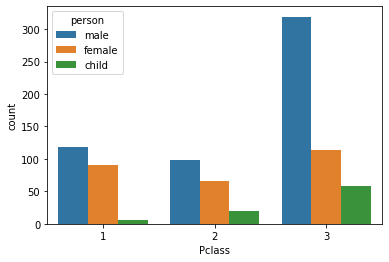

In [25]:
sns.countplot('Pclass', data = titanic_df,hue ='person')

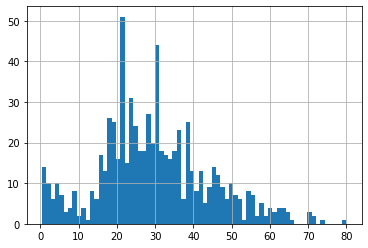

In [26]:
titanic_df['Age'].hist(bins=70)

In [27]:
titanic_df['Age'].mean()

29.69911764705882

In [29]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

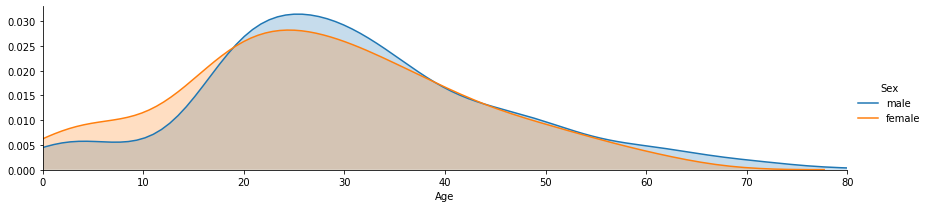

In [32]:
flg = sns.FacetGrid(titanic_df, hue = 'Sex', aspect=4)
flg.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
flg.set(xlim=(0,oldest))
flg.add_legend()

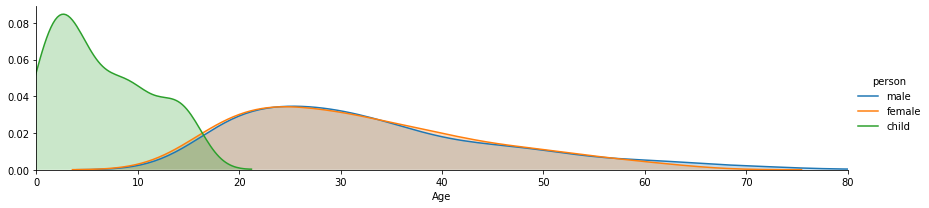

In [33]:
flg = sns.FacetGrid(titanic_df, hue = 'person', aspect=4)
flg.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
flg.set(xlim=(0,oldest))
flg.add_legend()